In [2]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

import cv2
import glob
from numpy import array

from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


#### Read the Data

In [4]:
def read_files(file_name):
  data = np.load(f"/content/drive/My Drive/Colab Notebooks/bootcamp_data/{file_name}.npy")
  return data

In [5]:
X_train = read_files('X_train')
X_val = read_files('X_val')
X_test = read_files('X_test')
y_train = read_files('y_train')
y_val = read_files('y_val')
y_test = read_files('y_test')

In [6]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape} y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, x_test:{y_test.shape}")

X_train: (7072, 112, 150), y_train: (7072, 1)
X_val: (786, 112, 150) y_val: (786, 1)
X_test: (874, 112, 150), x_test:(874, 1)


In [7]:
# Show distribution of the classes
df_lbl = pd.DataFrame(columns = {'label'}, data = y_train)
df_lbl['label'].value_counts()

9    810
2    810
4    810
5    810
0    810
7    810
3    810
8    752
1    347
6    303
Name: label, dtype: int64

In [8]:
df_lbl_tst = pd.DataFrame(columns = {'label'}, data = y_test)
df_lbl_tst['label'].value_counts()

7    100
0    100
4    100
9    100
5    100
2    100
3    100
8     93
1     43
6     38
Name: label, dtype: int64

In [9]:
X_train[0]

array([[1.        , 0.47058824, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.47058824, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.47058824, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.47058824, 0.59215686, ..., 0.44313725, 0.50196078,
        0.59215686],
       [1.        , 0.45882353, 0.23137255, ..., 0.17254902, 0.15686275,
        0.17254902],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

#### Model Training and Evaluation

In [10]:
# Create a model
model = tf.keras.Sequential()

In [11]:
# Add a convolution and max pooling layer
size_x = int(X_train[0].shape[0])
print(size_x)
size_y = int(X_train[0].shape[1])
print(size_y)

model.add(tf.keras.layers.Conv2D(32,
                              kernel_size=(7,7),
                              strides=(1,1),
                              padding="same",
                              activation="tanh",
                          input_shape= (size_x,size_y,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

112
150


In [12]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64, 
                                 kernel_size=(7,7),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(7,7),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))


In [13]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [14]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [15]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [17]:
# Train the model for 50 epochs with batch size of 128
results = model.fit( X_train, y_train, 
                     batch_size=32, 
                     epochs=40,
                     validation_data=(X_val, y_val)
                     )

Epoch 1/40
221/221 [==============================] - 104s 467ms/step - loss: 2.0146 - accuracy: 0.2568 - val_loss: 1.5129 - val_accuracy: 0.5038
Epoch 2/40
221/221 [==============================] - 103s 465ms/step - loss: 1.5372 - accuracy: 0.4570 - val_loss: 1.1312 - val_accuracy: 0.6247
Epoch 3/40
221/221 [==============================] - 103s 468ms/step - loss: 1.2717 - accuracy: 0.5618 - val_loss: 0.8935 - val_accuracy: 0.7303
Epoch 4/40
221/221 [==============================] - 103s 465ms/step - loss: 1.0625 - accuracy: 0.6434 - val_loss: 0.7172 - val_accuracy: 0.7952
Epoch 5/40
221/221 [==============================] - 103s 466ms/step - loss: 0.9380 - accuracy: 0.6968 - val_loss: 0.7310 - val_accuracy: 0.7812
Epoch 6/40
221/221 [==============================] - 103s 467ms/step - loss: 0.8276 - accuracy: 0.7316 - val_loss: 0.6596 - val_accuracy: 0.8041
Epoch 7/40
221/221 [==============================] - 103s 468ms/step - loss: 0.7218 - accuracy: 0.7643 - val_loss: 0.5119 -

#### Evaluation

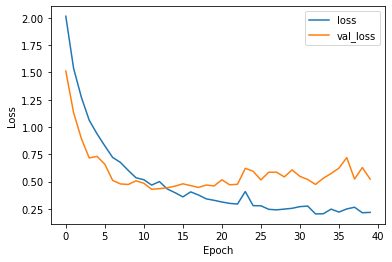

In [18]:
# Plot the the training loss
plt.plot(results.history['loss'], label='loss')

# Plot the the validation loss
plt.plot(results.history['val_loss'], label='val_loss')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Put legend table
plt.legend()

# Show the plot
plt.show()

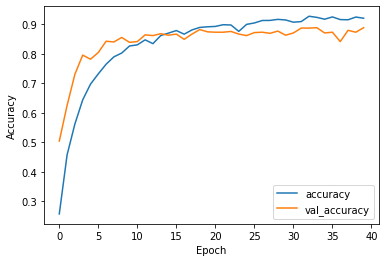

In [19]:
# Plot the the training accuracy
plt.plot(results.history['accuracy'], label='accuracy')


# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label='val_accuracy')

# Name the x and y axises
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [20]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 2s 56ms/step - loss: 0.6884 - accuracy: 0.8707


[0.6883988380432129, 0.8707093596458435]

In [21]:
# Make prediction on the reshaped sample
sample_number = 102
prediction_result = model.predict(X_test[sample_number].reshape(1,size_x,size_y,1))

# Print the prediction result
prediction_result

array([[9.2569898e-32, 7.9975609e-36, 5.6241601e-34, 1.1407422e-16,
        1.0000000e+00, 2.0377265e-36, 1.9843124e-37, 4.1865337e-23,
        2.3077358e-35, 2.0340432e-38]], dtype=float32)

In [22]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [23]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability.")
print(f"This image actually belongs to class {y_test[sample_number]} ")

This image belongs to class 4 with 1.0 probability.
This image actually belongs to class [4] 



*   The model is built and different hyperparameters were tried as changing one parameter at a time and fixing the others.

*   The kernel sizes such as 3x3, 5x5, 7x7 and 9x9 are tried. The accuracy results were 0.8787, 0.8741, 0.8879 and 0.8467 respectively. We chose the 7x7 kernel which is the best. 

*   Tanh was used as the activation function. However the accuracy was 0.11 and we chose the other function which is relu.

*   50 epochs were too much to train, because the loss graph was flat after 25 epochs. We kept it in 40 to assure having the sufficient training time. 

*   Number of kernels were reduced to half and increased to the twice. Reducing the number decreased the accuracy to 84.90, and inreasing results in the accuracy of 0.8535

* Finally we run the model with the best parameters among all combinations. 



 



